<a href="https://colab.research.google.com/github/vishaltomar21/Vishaltomar/blob/main/Big_Mart_Sales_Analysis_By_Vishal_Tomar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Liberaries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# Data Collection & Analysis:

In [2]:
# loading the train dataset from csv file to a Pandas DataFrame

df = pd.read_csv("/content/Train.csv")

# Number of data points & number of features
df.shape

(8523, 12)

In [3]:
# loading the test dataset from csv file to a Pandas DataFrame

df_test = pd.read_csv("/content/Test.csv")

# Number of data points & number of features
df_test.shape

(5681, 11)

# Dataset Details:

#####          Variable                  Description

Item Identifier             : Unique product ID

Item Weight                 : Weight of product

Item Fat Content            : Whether the product is low fat or not

Item Visibility             : The % of total display area of all products in a store allocated to the particular product
    
Item Type                   : The category to which the product belongs    
    
Item MRP                    : Maximum Retail Price (list price) of the product  
    
Outlet Identifier           : Unique store ID

Outlet Establishment_Year   : The year in which store was established

Outlet Size                 : The size of the store in terms of ground area covered
    
Outlet Location Type        : The type of city in which the store is located  
    
Outlet Type                 : Whether the outlet is just a grocery store or some sort of supermarket
    
Item Outlet Sales           : Sales of the product in the particular store. This is the outcome variable to be predicted.  

In [4]:
# First 5 rows of the dataset
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<Axes: xlabel='Item_Outlet_Sales', ylabel='Item_Visibility'>

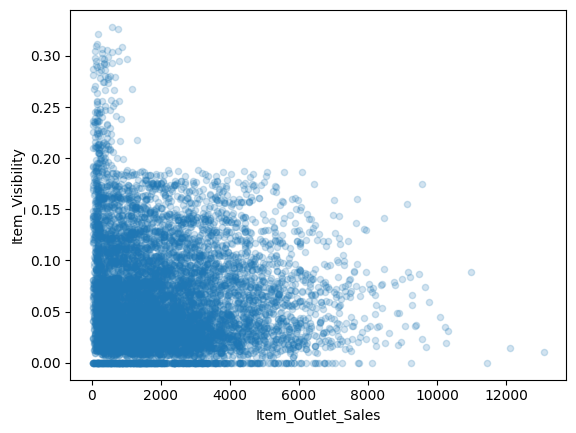

In [6]:
df.plot(kind = 'scatter', x='Item_Outlet_Sales', y='Item_Visibility', alpha = 0.2)


In [7]:
corr_matrix = df.corr()
corr_matrix

<ipython-input-7-208d05607fc1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [8]:
df = df.sort_values(by='Item_Identifier')

In [9]:
df2 = df.copy()

In [10]:
# Checking for missing values
df2.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handiling Missing Values:

In [11]:
df2['Item_Weight'].fillna(method='ffill', inplace=True)

In [12]:
df2.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
median = df_test['Item_Weight'].median()
df_test['Item_Weight'].fillna(median, inplace= True)

In [14]:
df2.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8043,DRA12,11.6,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
118,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
1693,DRA12,11.6,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
1197,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772


In [16]:
df2[['Outlet_Size']].value_counts()

Outlet_Size
Medium         2793
Small          2388
High            932
dtype: int64

In [17]:
df3 = df2.copy()

In [18]:
df3.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg':'Regular'}}, inplace=True)

In [19]:
df3[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             5517
Regular             3006
dtype: int64

In [20]:
# Filling the missing values in "Outlet_Size" column with 'Mode'
mode_Outlet_size = df3.pivot_table(values='Outlet_Size',columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [21]:
mode_Outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [22]:
# Outlet_Type	Grocery Store	Supermarket Type1	Supermarket Type2	Supermarket Type3
# Outlet_Size	    Small       	    Small   	     Medium     	       Medium

# It means:

# Most frequent value in the Grocery Store are Small.
# Most frequent value in the Supermarket Type1 Store are Small.
# Most frequent value in the Supermarket Type2 Store are Medium.
# Most frequent value in the Supermarket Type3 Store are Medium.


In [23]:
missing_val = df3['Outlet_Size'].isnull()
missing_val

8043     True
118      True
1693    False
1197     True
1245    False
        ...  
7926    False
214      True
1896    False
7166    False
7738    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [24]:
df3.loc[missing_val, 'Outlet_Size']

8043    NaN
118     NaN
1197    NaN
4130    NaN
1148    NaN
       ... 
411     NaN
1115    NaN
4924    NaN
1969    NaN
214     NaN
Name: Outlet_Size, Length: 2410, dtype: object

In [25]:
df3.loc[missing_val, 'Outlet_Size'] = df3.loc[missing_val, 'Outlet_Type'].apply(lambda x: mode_Outlet_size[x])

In [26]:
df3.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [27]:
df3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8043,DRA12,11.6,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,Small,Tier 3,Grocery Store,283.6308
118,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,Small,Tier 2,Supermarket Type1,2552.6772
1693,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
1197,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,Small,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772


In [28]:
df3['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
NCL31     9
FDX04     9
NCQ06     9
         ..
FDN52     1
FDC23     1
FDT35     1
DRF48     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 8043 to 7738
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [30]:
df4 = df3.copy()

In [31]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 8043 to 7738
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [32]:
df4.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [33]:
df4.shape

(8523, 12)

Data Analysis:

In [34]:
# Statistical measure about the data
df4.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.871711,0.066132,140.992782,1997.831867,2181.288914
std,4.651306,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.775000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Numerical Features:

12.150    105
17.600     99
15.100     91
11.800     90
13.650     90
         ... 
5.675       2
6.775       2
5.210       2
7.685       1
6.520       1
Name: Item_Weight, Length: 415, dtype: int64


<ipython-input-35-d937391f7a08>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['Item_Weight']);


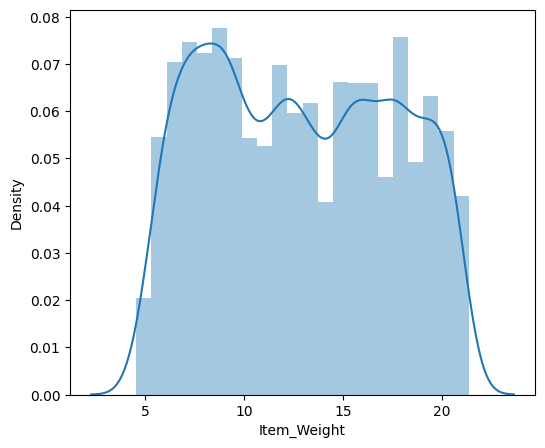

In [35]:
# Item_Weight distibution
print(df4['Item_Weight'].value_counts())
plt.figure(figsize=(6,5))
sns.distplot(df4['Item_Weight']);

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 1.0, 'Item Weight Boxplot')

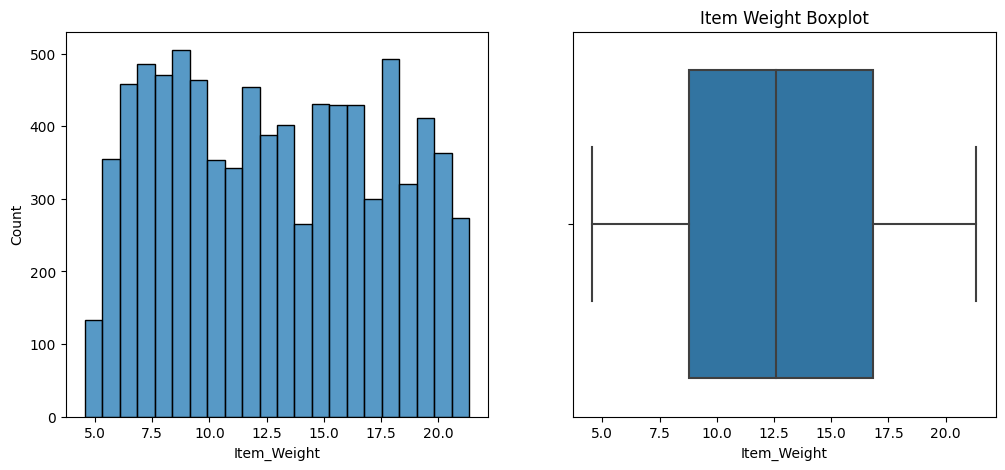

In [36]:
fig, ax=plt.subplots(1,2,figsize=(12,5))

sns.histplot(data=df4, x='Item_Weight', ax=ax[0])

sns.boxplot(data=df4, x='Item_Weight', ax=ax[1], orient="v")
plt.title("Item Weight Boxplot")

0.000000    526
0.076975      3
0.061164      2
0.127930      2
0.077290      2
           ... 
0.057792      1
0.057910      1
0.057744      1
0.057512      1
0.083699      1
Name: Item_Visibility, Length: 7880, dtype: int64


<ipython-input-37-6210a7fc1336>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['Item_Visibility']);


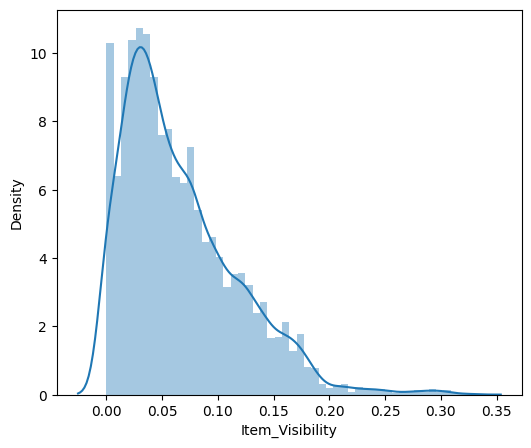

In [37]:
# Item_Visibility distibution
print(df4['Item_Visibility'].value_counts())
plt.figure(figsize=(6,5))
sns.distplot(df4['Item_Visibility']);

# This column contains 526 Zeros (0.000000    526), Convert these zeros into missing values

<Axes: xlabel='Item_Visibility'>

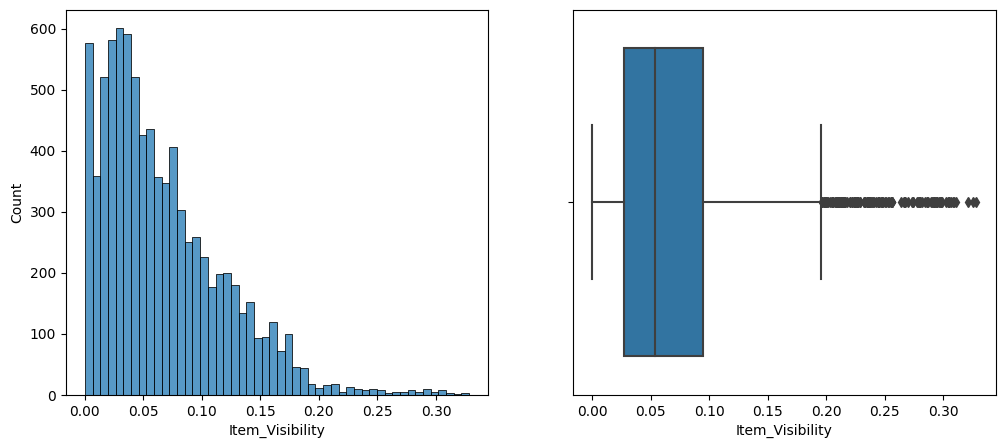

In [38]:
fig, ax=plt.subplots(1,2,figsize=(12,5))

sns.histplot(data=df4, x='Item_Visibility', ax=ax[0])
sns.boxplot(data=df4, x='Item_Visibility', ax=ax[1])

In [39]:
df4['Item_Visibility_Inter'] = df4['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [40]:
df4['Item_Visibility_Inter'].value_counts()

# Now we have successfully handel zeros as missing values & alse we have filled  missing values using linear interpolate .

0.076975    3
0.058121    2
0.107057    2
0.121250    2
0.097611    2
           ..
0.021985    1
0.036591    1
0.122123    1
0.122565    1
0.083699    1
Name: Item_Visibility_Inter, Length: 8405, dtype: int64

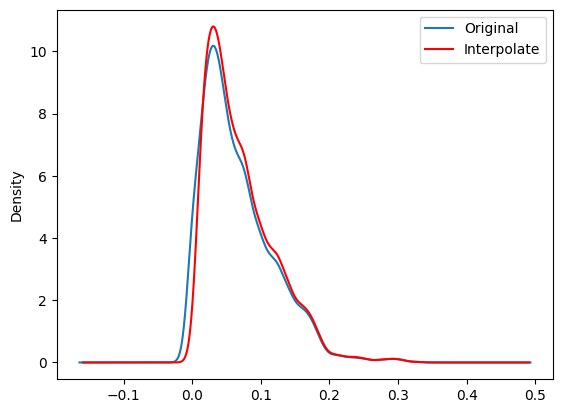

In [41]:
# Now Let's check distribution before & after interpolation

df4['Item_Visibility'].plot(kind='kde', label='Original')

df4['Item_Visibility_Inter'].plot(kind='kde', color='red', label='Interpolate')

plt.legend()
plt.show()

# We can see distributions are very close to each other, we have successfully handels zeros that availabels in the df['Item_Visibility'] column.

<Axes: xlabel='Item_Visibility_Inter'>

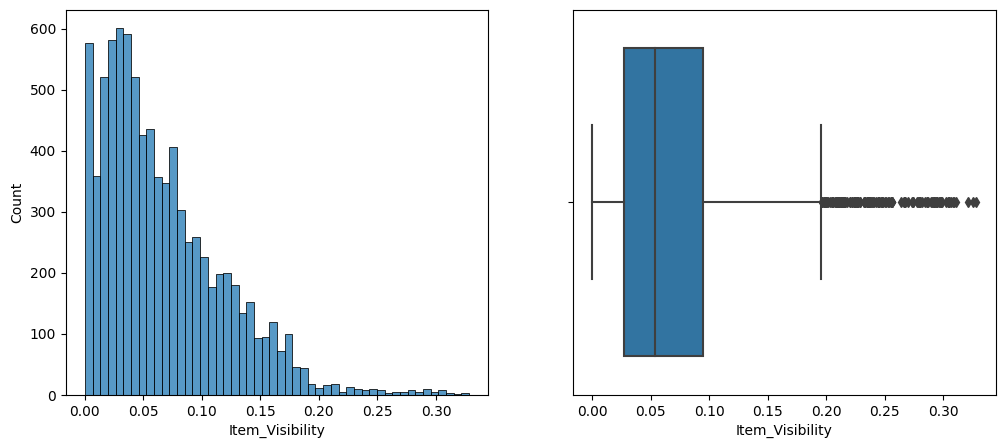

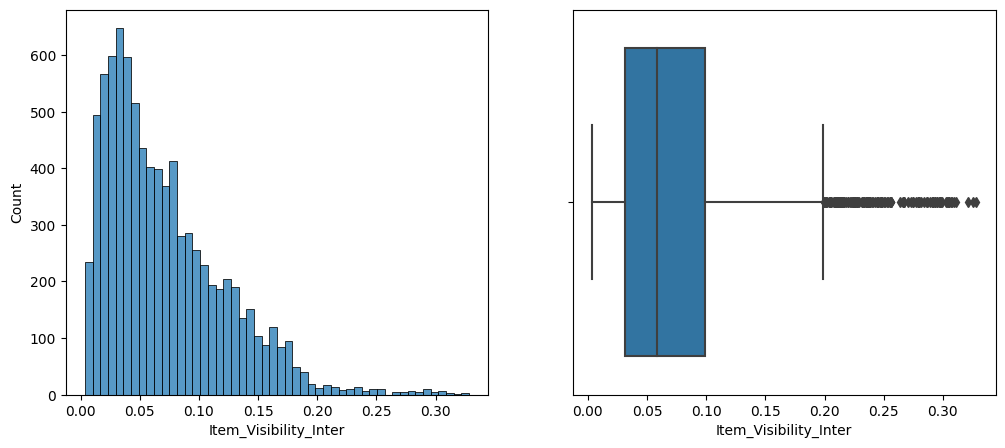

In [42]:
fig, ax=plt.subplots(1,2,figsize=(12,5))

sns.histplot(data=df4, x='Item_Visibility', ax=ax[0])
sns.boxplot(data=df4, x='Item_Visibility', ax=ax[1])

fig, ax=plt.subplots(1,2,figsize=(12,5))

sns.histplot(data=df4, x='Item_Visibility_Inter', ax=ax[0])
sns.boxplot(data=df4, x='Item_Visibility_Inter', ax=ax[1])

In [43]:
# Now drop 1st column

df4.drop('Item_Visibility', axis=1, inplace=True)
df4.rename({'Item_Visibility_Inter': 'Item_Visibility'}, axis=1, inplace=True)

In [44]:
df4['Item_Visibility'].value_counts()

0.076975    3
0.058121    2
0.107057    2
0.121250    2
0.097611    2
           ..
0.021985    1
0.036591    1
0.122123    1
0.122565    1
0.083699    1
Name: Item_Visibility, Length: 8405, dtype: int64

In [45]:
df4.columns

arange_order  = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']
df4 = df4[arange_order]

In [46]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


0.076975    3
0.058121    2
0.107057    2
0.121250    2
0.097611    2
           ..
0.021985    1
0.036591    1
0.122123    1
0.122565    1
0.083699    1
Name: Item_Visibility, Length: 8405, dtype: int64


<ipython-input-47-81ed386c5b57>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['Item_Visibility']);


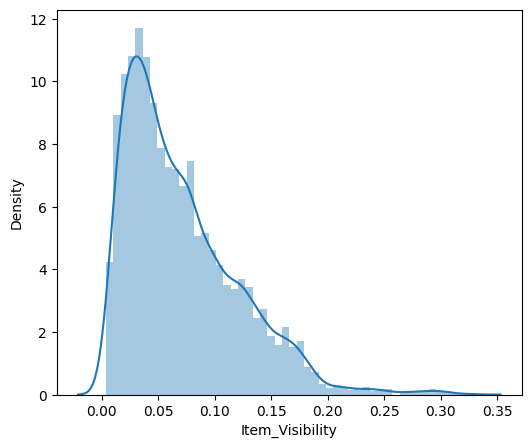

In [47]:
# Item_Visibility distibution
print(df4['Item_Visibility'].value_counts())
plt.figure(figsize=(6,5))
sns.distplot(df4['Item_Visibility']);

172.0422    7
142.0154    6
170.5422    6
196.5084    6
109.5228    6
           ..
127.3020    1
126.0020    1
173.3738    1
175.5738    1
160.9552    1
Name: Item_MRP, Length: 5938, dtype: int64


<ipython-input-48-f6b55d1ea214>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['Item_MRP']);


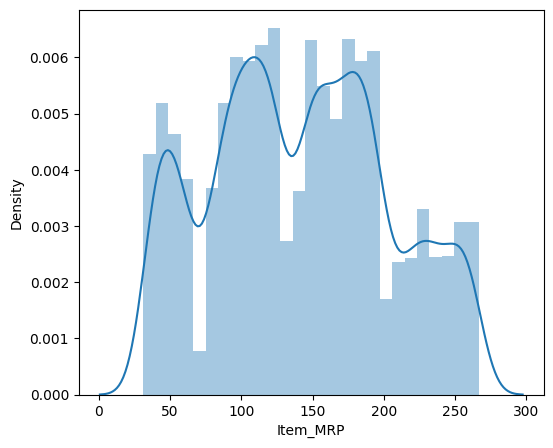

In [48]:
# Item_MRP distibution
print(df4['Item_MRP'].value_counts())
plt.figure(figsize=(6,5))
sns.distplot(df4['Item_MRP']);

<Axes: xlabel='Item_MRP'>

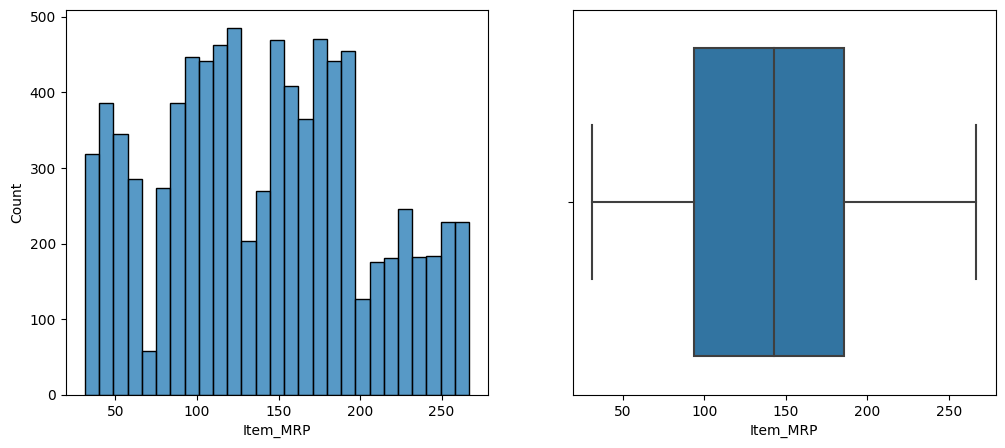

In [49]:
fig, ax=plt.subplots(1,2,figsize=(12,5))

sns.histplot(data=df4, x='Item_MRP', ax=ax[0])
sns.boxplot(data=df4, x='Item_MRP', ax=ax[1])

958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1278.3360    14
             ..
2270.3780     1
825.5920      1
2597.2858     1
1306.9654     1
5523.4768     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64


<ipython-input-50-0b28361846f1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['Item_Outlet_Sales']);


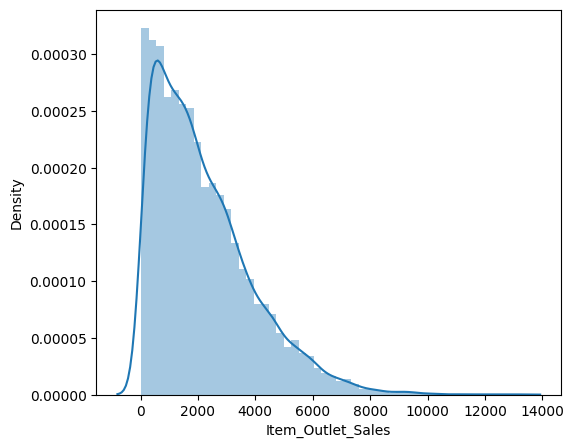

In [50]:
# Item_Outlet_Sales distibution
print(df4['Item_Outlet_Sales'].value_counts())
plt.figure(figsize=(6,5))
sns.distplot(df4['Item_Outlet_Sales']);

1985    1463
1987     932
2004     930
1999     930
1997     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


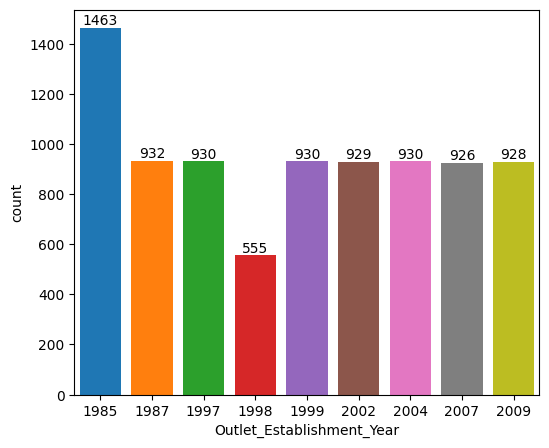

In [51]:
# Outlet_Establishment_Year column

print(df4['Outlet_Establishment_Year'].value_counts())
plt.figure(figsize=(6,5))
ax = sns.countplot(x = 'Outlet_Establishment_Year', data=df4, saturation=3)
ax.bar_label(ax.containers[0]);

In [52]:
df4.shape

(8523, 12)

<Axes: xlabel='Outlet_Establishment_Year'>

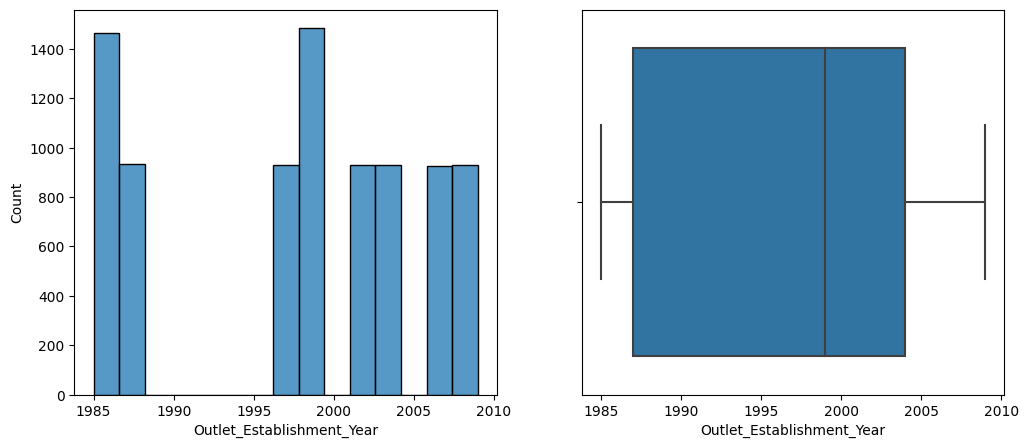

In [53]:
fig, ax=plt.subplots(1,2,figsize=(12,5))

sns.histplot(data=df4, x='Outlet_Establishment_Year', ax=ax[0])
sns.boxplot(data=df4, x='Outlet_Establishment_Year', ax=ax[1])

Categorical Features:

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


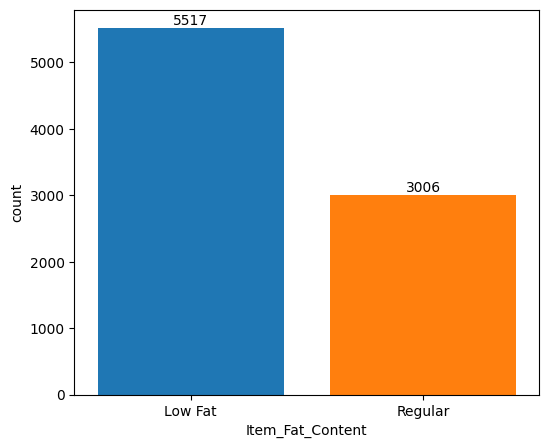

In [54]:
# Item_Fat_Content column

print(df4['Item_Fat_Content'].value_counts())
plt.figure(figsize=(6,5))
ax = sns.countplot(x = 'Item_Fat_Content', data=df4, saturation=3)
ax.bar_label(ax.containers[0]);

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


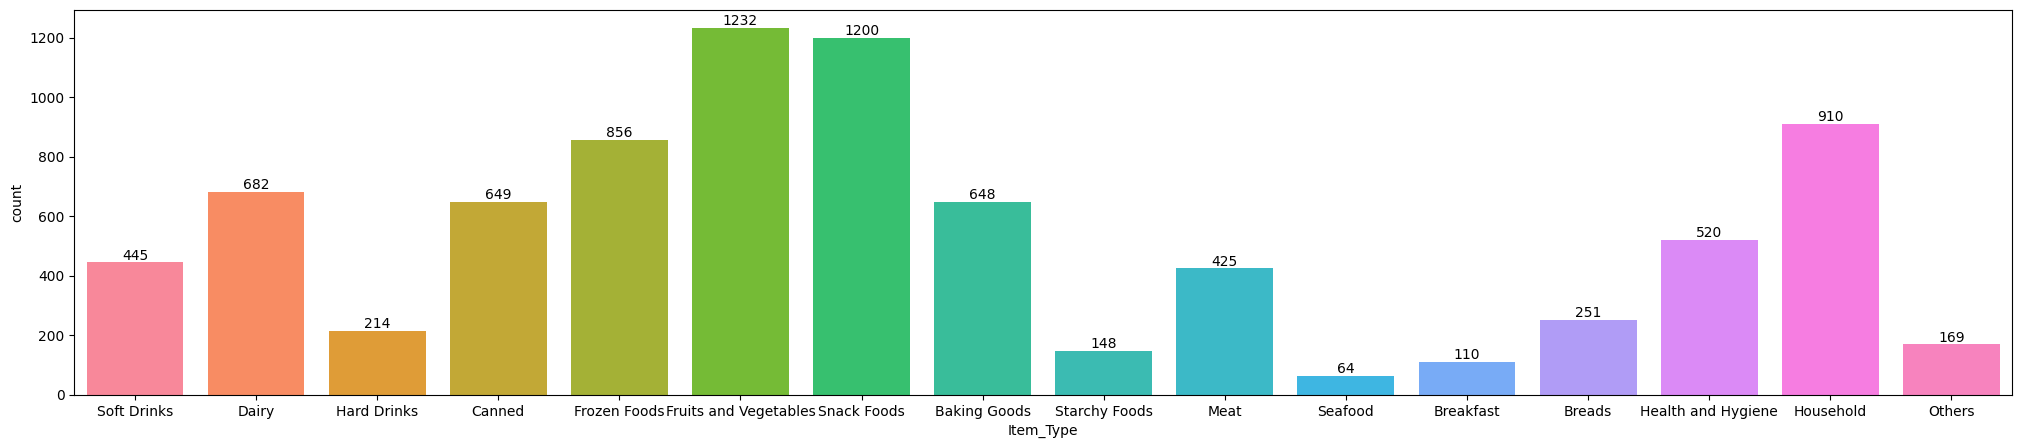

In [55]:
# Item_Type column

print(df4['Item_Type'].value_counts())
plt.figure(figsize=(25,5))
ax = sns.countplot(x = 'Item_Type', data=df4, saturation=3)
ax.bar_label(ax.containers[0]);

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64


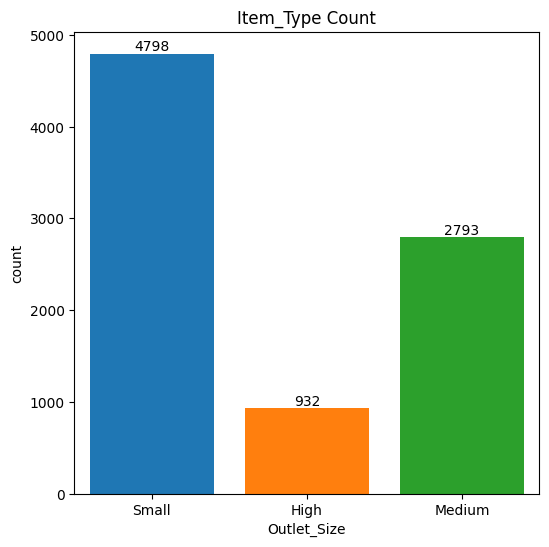

In [56]:
# Outlet_Size column

print(df4['Outlet_Size'].value_counts())
plt.figure(figsize=(6,6))
ax = sns.countplot(x = 'Outlet_Size', data=df4, saturation=3)
plt.title('Item_Type Count')
ax.bar_label(ax.containers[0]);

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


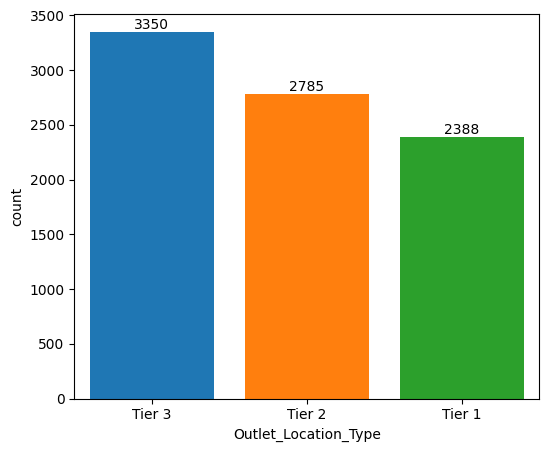

In [57]:
# Outlet_Location_Type column

print(df4['Outlet_Location_Type'].value_counts())
plt.figure(figsize=(6,5))
ax = sns.countplot(x = 'Outlet_Location_Type', data=df4, saturation=3)
ax.bar_label(ax.containers[0]);

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


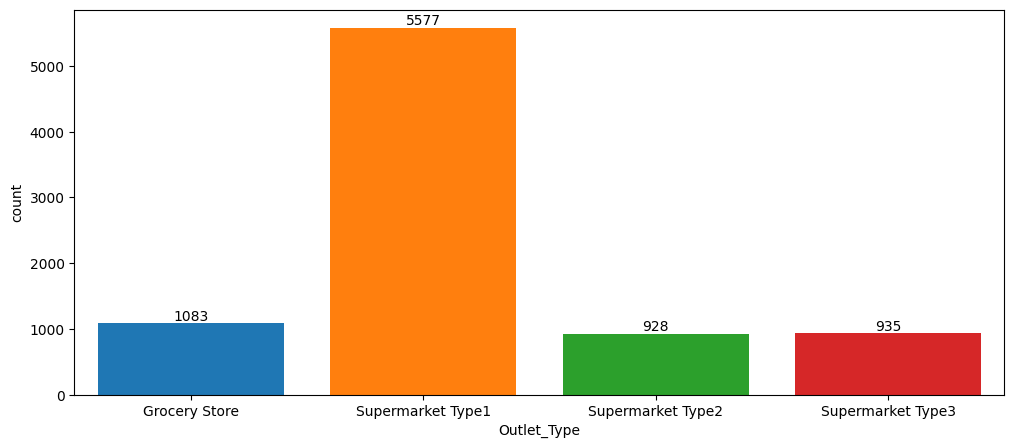

In [58]:
# Outlet_Type column

print(df4['Outlet_Type'].value_counts())
plt.figure(figsize=(12,5))
ax = sns.countplot(x = 'Outlet_Type', data=df4, saturation=3)
ax.bar_label(ax.containers[0]);

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


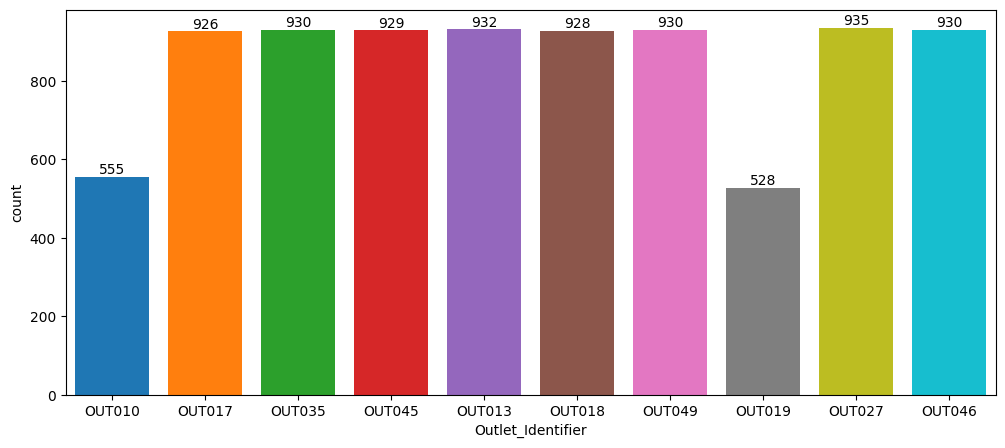

In [59]:
# Outlet_Identifier column

print(df4['Outlet_Identifier'].value_counts())
plt.figure(figsize=(12,5))
ax = sns.countplot(x = 'Outlet_Identifier', data=df4, saturation=3)
ax.bar_label(ax.containers[0]);

# Category column realizations:



* Item_Fat_Content = Most Items sold are Low Fat.
* Item_Type = Item types that are distictly popular are Fruits and Vegetables and Snack Foods.
* Outlier_Identifier = Sold items are distributed evenly among outliers excluding OUT010 and OUT019 that are significantly lower.
* Outlier_Size = Bigmart outlets are  mostly Small size in our data
* Outlet_Location_Type = The most common type Tier 3.





In [60]:
# Item_Identifier column

df4['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
NCL31     9
FDX04     9
NCQ06     9
         ..
FDN52     1
FDC23     1
FDT35     1
DRF48     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [61]:
df4['Item_Identifier'] = df4['Item_Identifier'].apply(lambda x: x[:2])

In [62]:
df4['Item_Identifier'].value_counts()

# Food
# Non consumable
# Drink

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

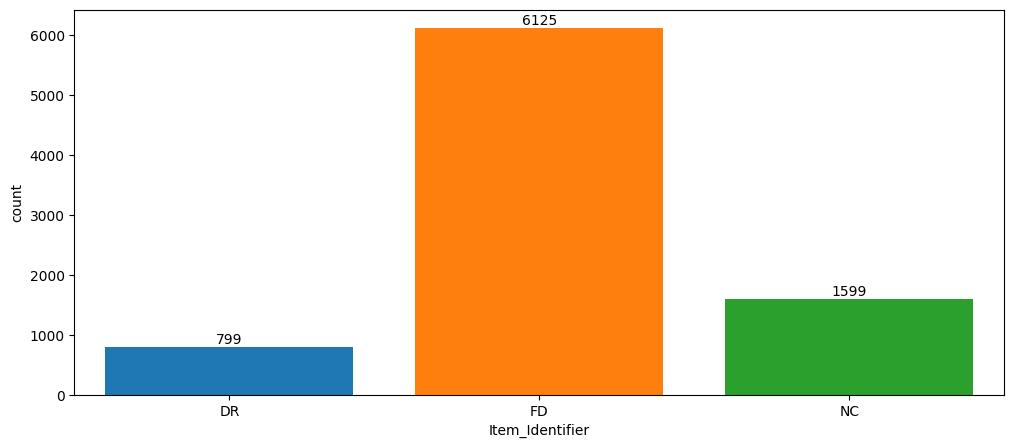

In [63]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x = 'Item_Identifier', data=df4, saturation=3)
ax.bar_label(ax.containers[0]);

In [64]:
df4.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

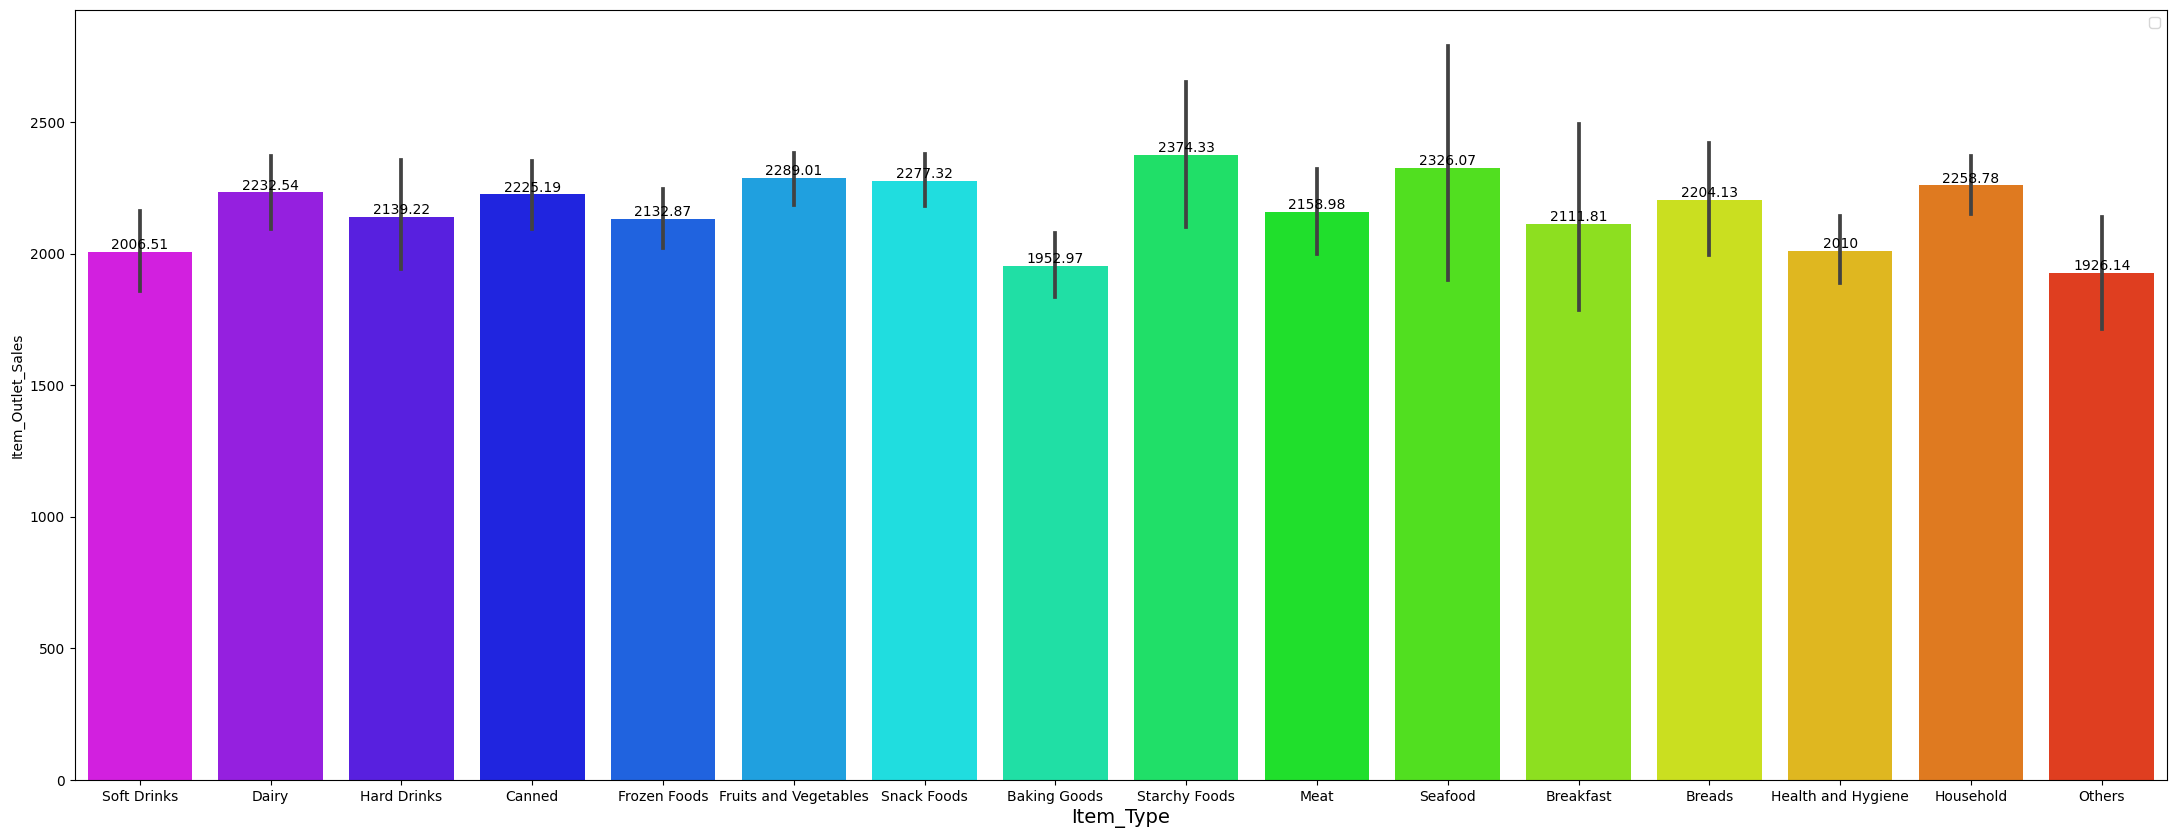

In [65]:

plt.figure(figsize=(27, 10))
ax = sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=df4, palette = 'gist_rainbow_r')
ax.bar_label(ax.containers[0])
plt.xlabel("Item_Type", fontsize=14)
plt.legend();

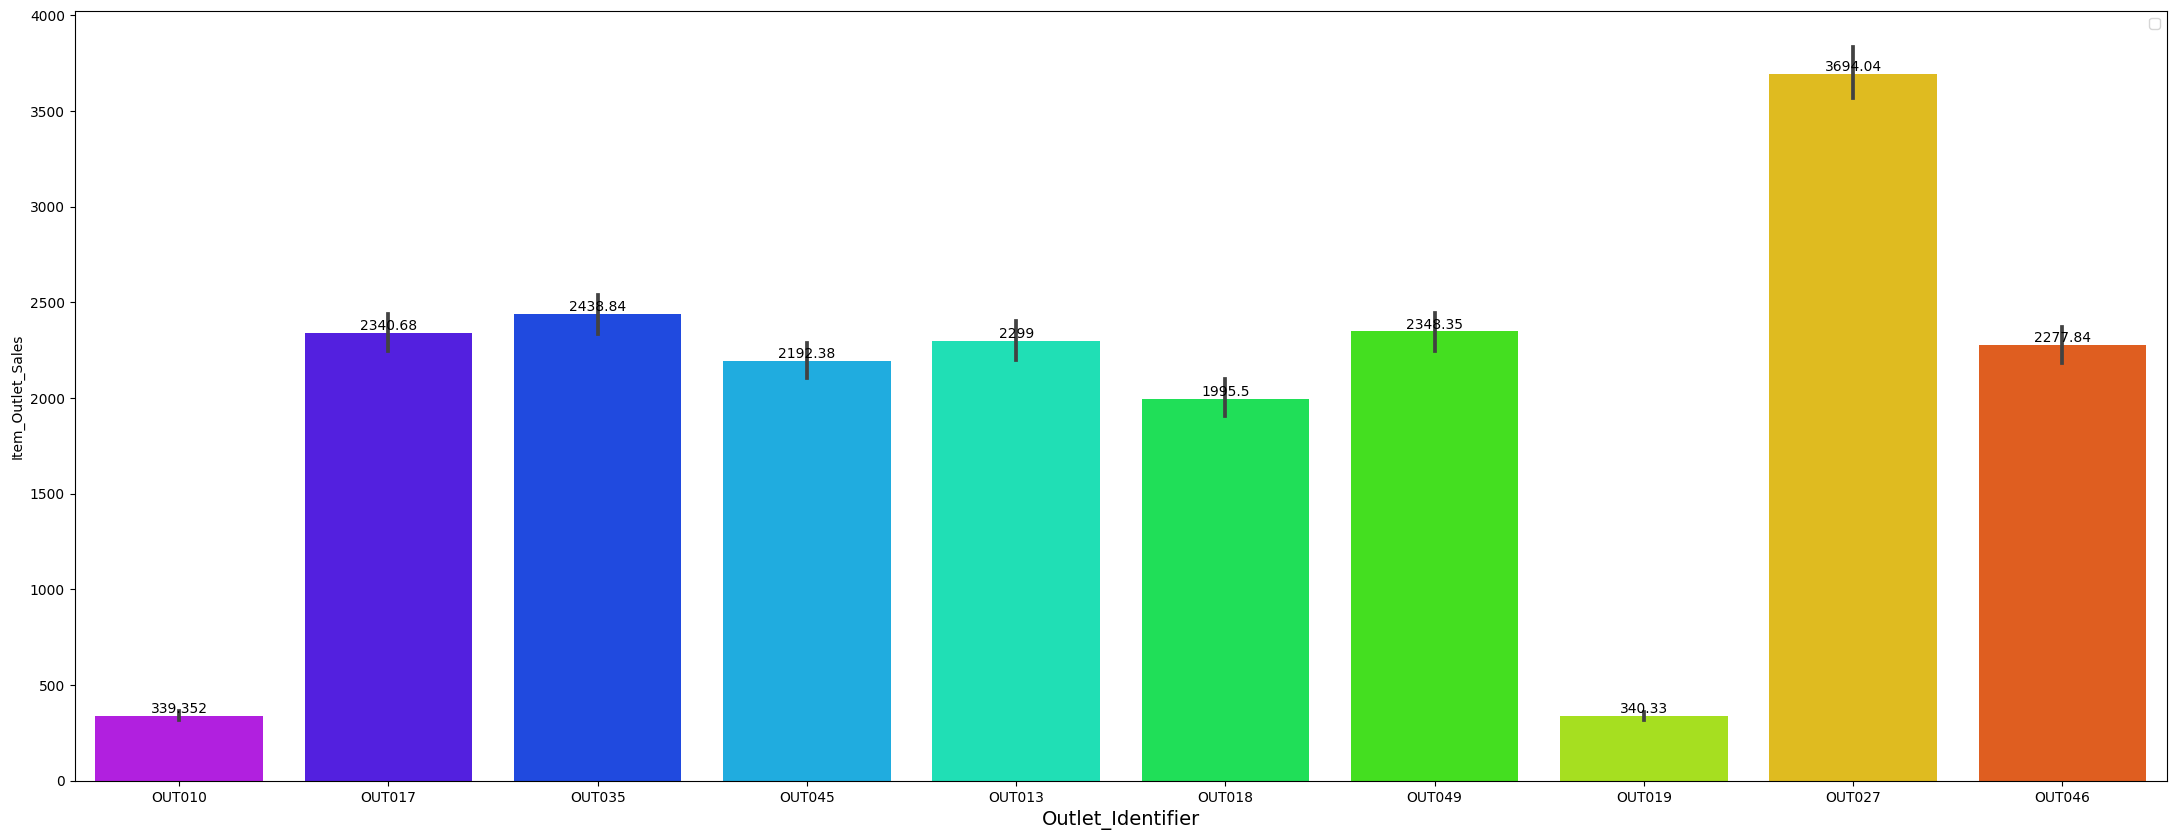

In [66]:
plt.figure(figsize=(27, 10))
ax = sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=df4, palette = 'gist_rainbow_r')
ax.bar_label(ax.containers[0])
plt.xlabel("Outlet_Identifier", fontsize=14)
plt.legend();

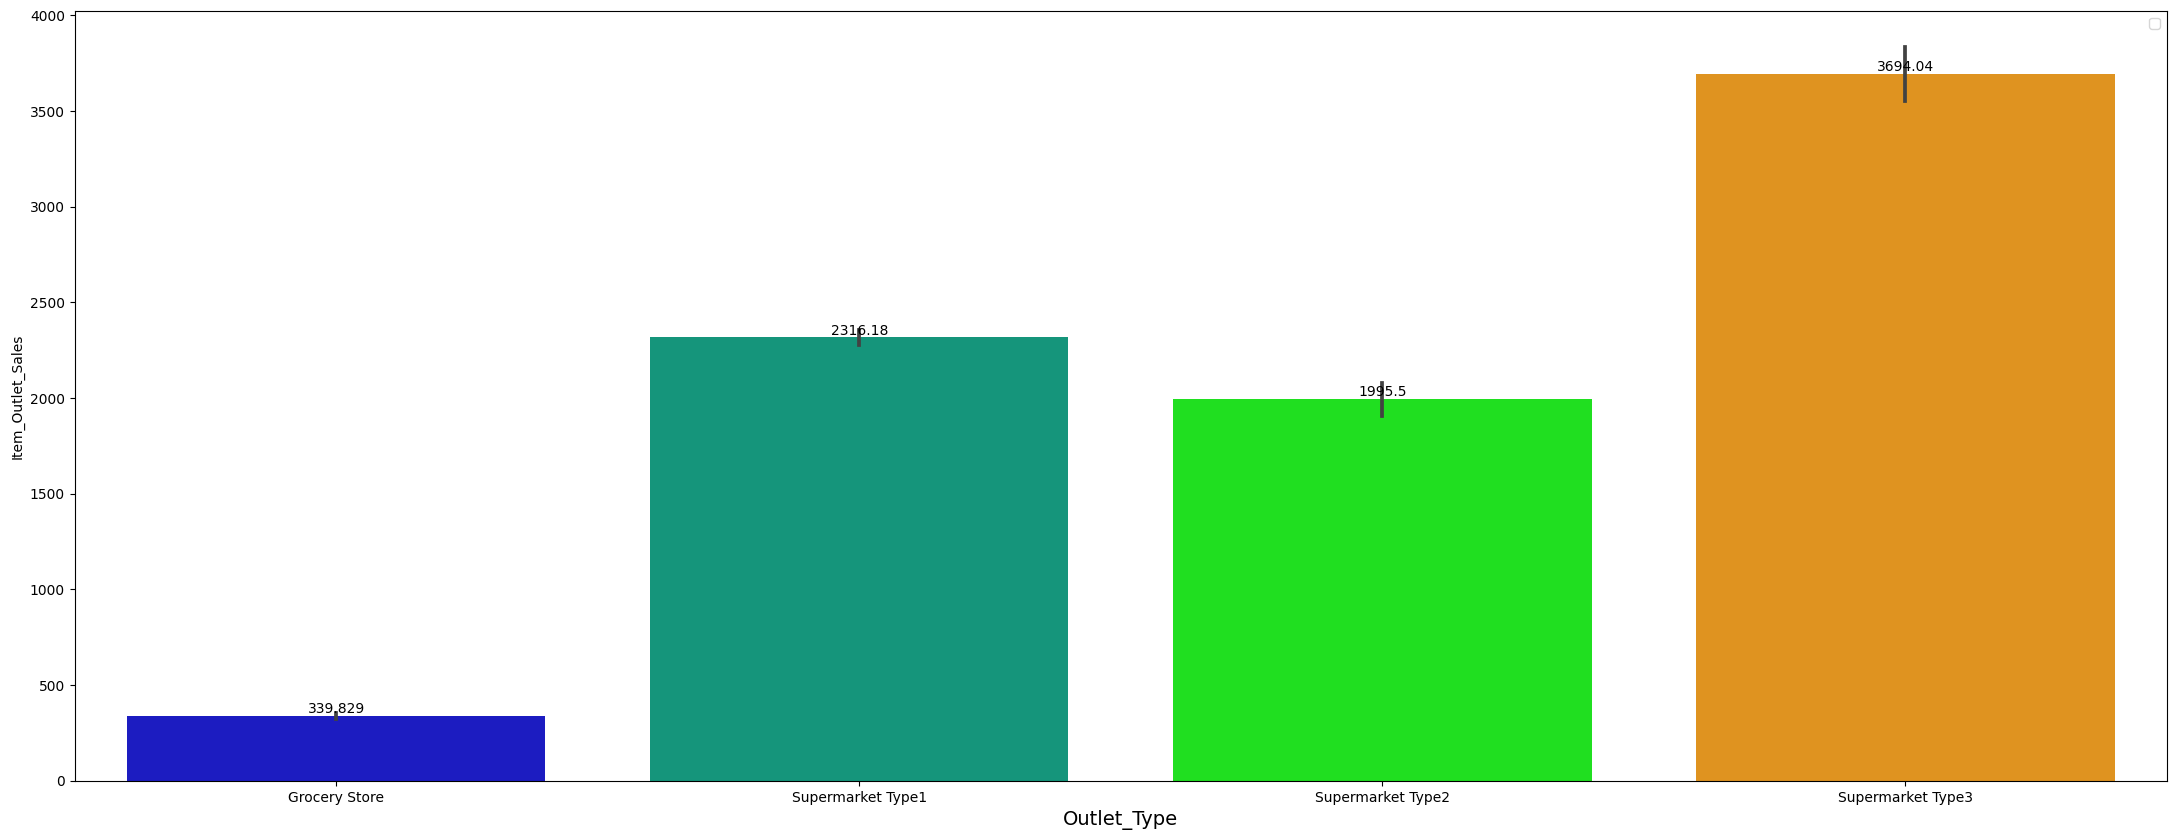

In [67]:
plt.figure(figsize=(27, 10))
ax = sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df4, palette = 'nipy_spectral')
ax.bar_label(ax.containers[0])
plt.xlabel("Outlet_Type", fontsize=14)
plt.legend();


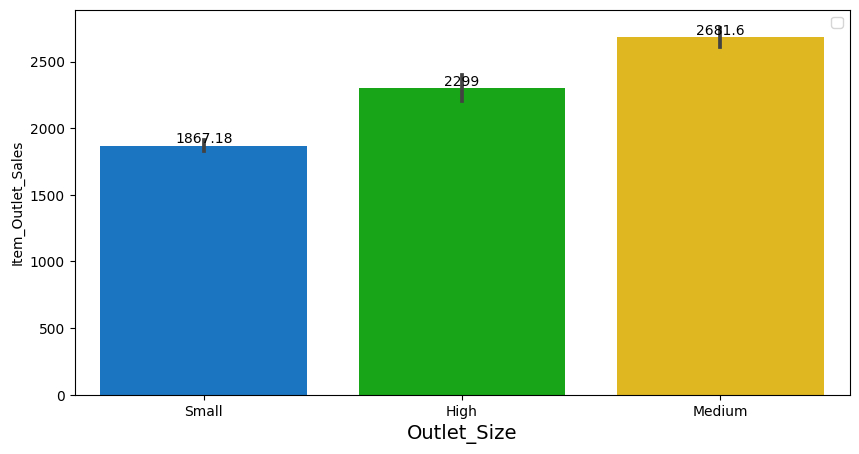

In [68]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df4, palette = 'nipy_spectral')
ax.bar_label(ax.containers[0])
plt.xlabel("Outlet_Size", fontsize=14)
plt.legend();

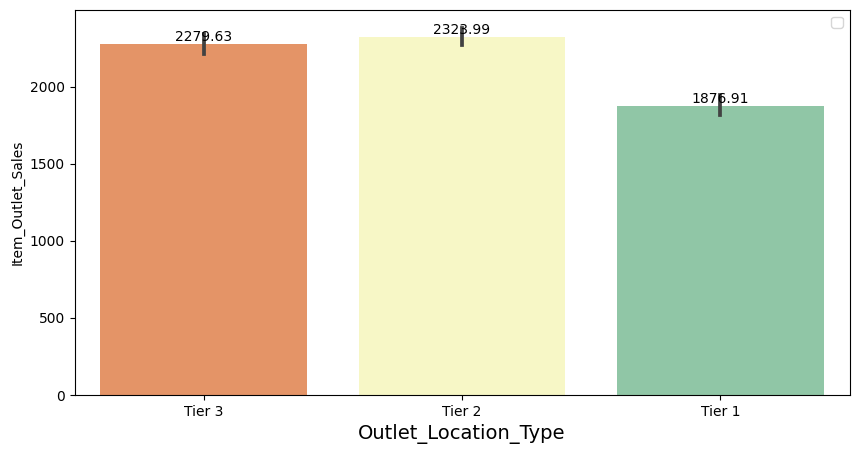

In [69]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df4, palette = 'Spectral')
ax.bar_label(ax.containers[0])
plt.xlabel("Outlet_Location_Type", fontsize=14)
plt.legend();

## Realizations:

* The difference in item types by sales is very small.
* Outlet 27 is the most profitable and there is a big difference between each specific outlet.
* Suprisingly supermarket type 3 is the most profitable and not type 1.
* Medium and High outlet sizes are pretty much even in sales.
* Tier 2 and 3 are almost even being the highest in sales (2 is slightly larger)

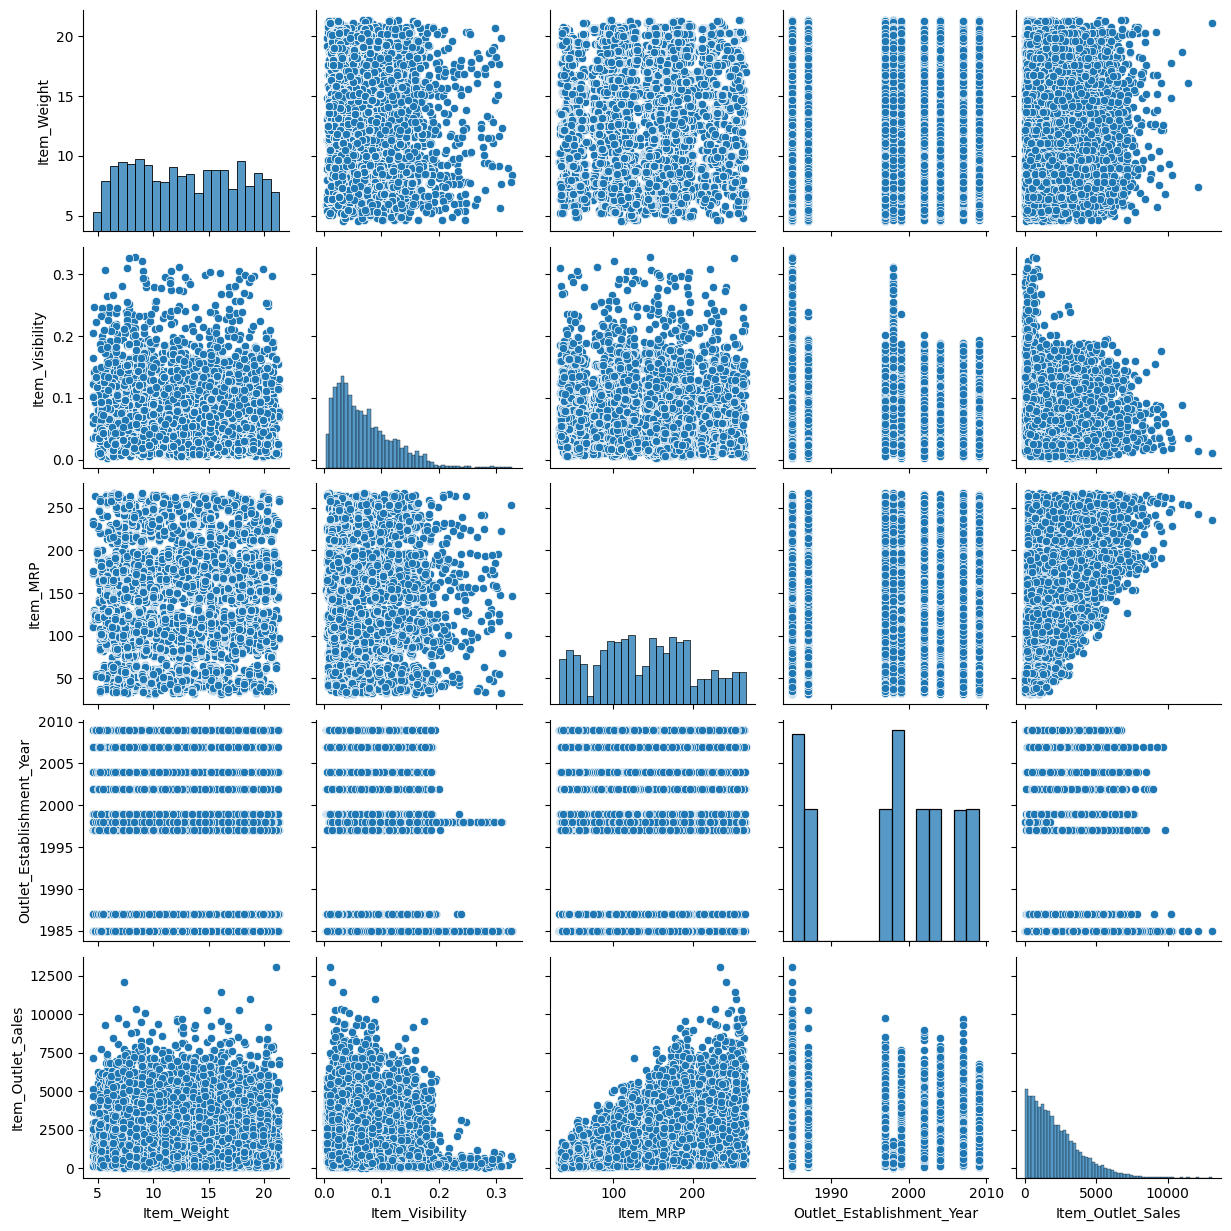

In [70]:
sns.pairplot(df4)

<ipython-input-71-058ac3b72133>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df4.corr(), annot=True)


<Axes: >

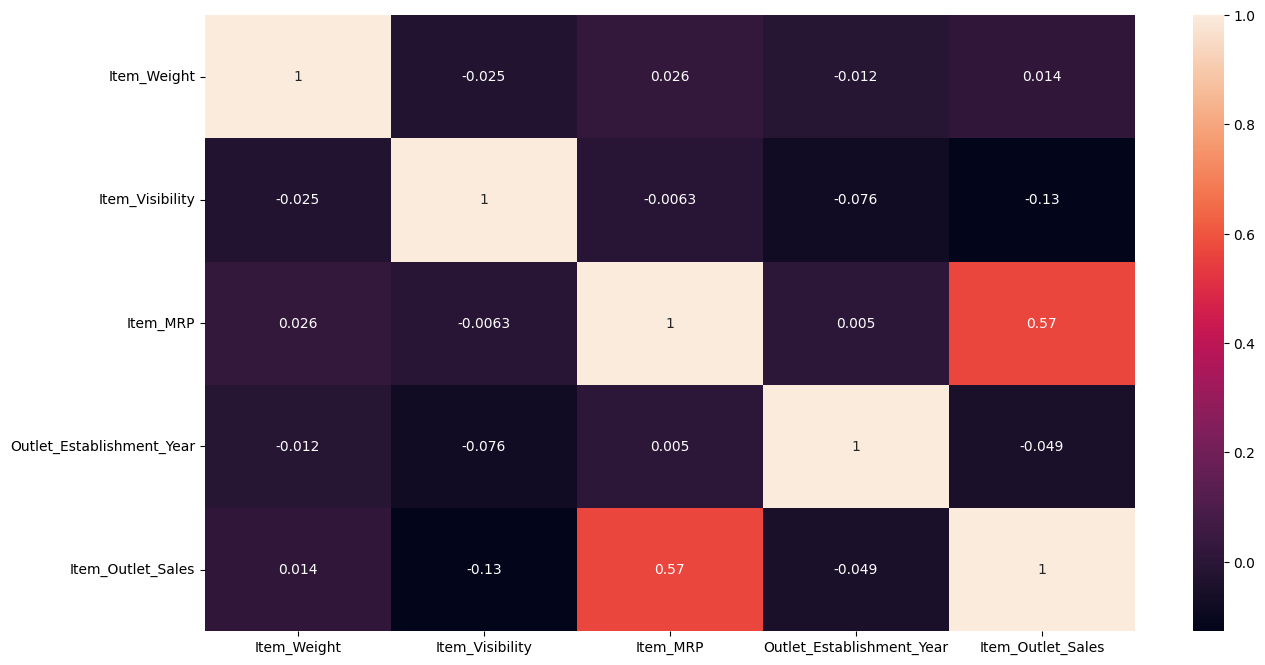

In [71]:
# Plotting the correlation matrix

plt.figure(figsize=(15,8))
sns.heatmap(df4.corr(), annot=True)

# Data Pre-Processing

In [72]:
le = LabelEncoder()

In [73]:
for i in df4.columns:
    if df4[i].dtype=='O':
        df4[i] = le.fit_transform(df4[i])

In [74]:
df4.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8043,0,11.6,0,0.068535,14,143.0154,0,1998,2,2,0,283.6308
118,0,11.6,0,0.041178,14,140.3154,2,2007,2,1,1,2552.6772
1693,0,11.6,0,0.041089,14,141.9154,6,2004,2,1,1,992.7078
1197,0,11.6,0,0.041000,14,141.6154,7,2002,2,1,1,3829.0158
1245,0,11.6,0,0.040912,14,142.3154,1,1987,0,2,1,2552.6772


In [75]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 8043 to 7738
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 865.6 KB


# Splitting Features and Target:

In [76]:
X = df4.drop(columns= 'Item_Outlet_Sales', axis=1)
y = df4['Item_Outlet_Sales']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [78]:
X_train.shape, X_test.shape, X.shape

((6818, 11), (1705, 11), (8523, 11))

# Machine Learning Model Training
(XGBRFRegressor)

In [79]:
model = XGBRegressor()

In [80]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [81]:
model.score(X_train,  y_train)

0.8598236195175393

In [82]:
model.score(X_test,  y_test)

0.5220194612241971

<Axes: >

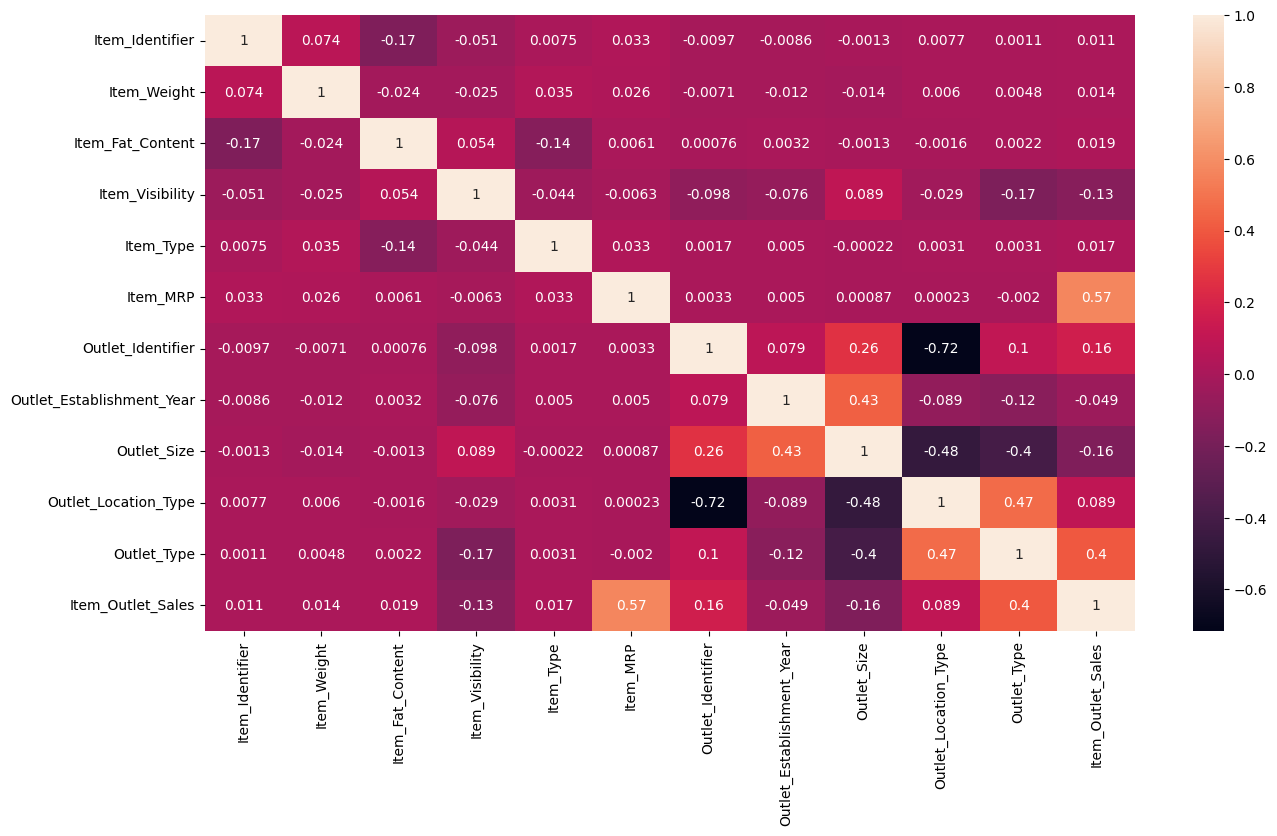

In [83]:
plt.figure(figsize=(15,8))
sns.heatmap(df4.corr(), annot=True)

# Now Taking the test data set and see the predicted results

In [84]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [85]:
median = df_test['Item_Weight'].median()
df_test['Item_Weight'].fillna(median, inplace= True)

df_test.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg':'Regular'}}, inplace=True)

In [86]:
mode_Outlet_size_test = df_test.pivot_table(values='Outlet_Size',columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [87]:
missing_val_test = df_test['Outlet_Size'].isnull()
missing_val_test.value_counts()

False    4075
True     1606
Name: Outlet_Size, dtype: int64

In [88]:
df_test.loc[missing_val_test, 'Outlet_Size'] = df_test.loc[missing_val_test, 'Outlet_Type'].apply(lambda x: mode_Outlet_size_test[x])

In [89]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [90]:
for i in df_test.columns:
    if df_test[i].dtype=='O':
        df_test[i] = le.fit_transform(df_test[i])

In [91]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300,1,0.038428,4,87.3198,2,2007,2,1,1
2,1406,14.600,0,0.099575,11,241.7538,0,1998,2,2,0
3,809,7.315,0,0.015388,13,155.0340,2,2007,2,1,1
4,1184,12.500,1,0.118599,4,234.2300,5,1985,1,2,3


In [92]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   int64  
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   int64  
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   int64  
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   int64  
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   int64  
 9   Outlet_Location_Type       5681 non-null   int64  
 10  Outlet_Type                5681 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 488.3 KB


In [93]:
test_data_predict = model.predict(df_test)

In [94]:
print(test_data_predict[3803])

2160.083


In [95]:
test_data_predict

array([1620.4486, 1480.6094,  384.7707, ..., 1710.1293, 4392.715 ,
       1355.8058], dtype=float32)

In [96]:
df_test['Predicted_Sales'] = test_data_predict

In [97]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Predicted_Sales
0,1103,20.750,0,0.007565,13,107.8622,9,1999,1,0,1,1620.448608
1,1067,8.300,1,0.038428,4,87.3198,2,2007,2,1,1,1480.609375
2,1406,14.600,0,0.099575,11,241.7538,0,1998,2,2,0,384.770691
3,809,7.315,0,0.015388,13,155.0340,2,2007,2,1,1,2241.578369
4,1184,12.500,1,0.118599,4,234.2300,5,1985,1,2,3,6216.207520
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500,1,0.013496,13,141.3154,8,1997,2,0,1,2320.919434
5677,306,7.600,1,0.142991,15,169.1448,3,2009,1,2,2,3655.574463
5678,1412,10.000,0,0.073529,8,118.7440,7,2002,2,1,1,1710.129272
5679,517,15.300,1,0.000000,3,214.6218,2,2007,2,1,1,4392.714844


# As We can see the :

train dataset has prediction of 0.86 on training data set and 0.52 at test dataset